### Fine Tip Clearance Test Objective


### Procedure
- Ensure the drone is positioned on the tester rails such that the fishing line is slack
- Fix the current limit of the DC power supply connected in parallel with the lead acid battery to the same value for all tests. This should be a value between 2 and 8 amps, since the supply is fused at 10A
- Initiate sweep from 30-100% throttle in increments of 10%, holding each throttle for 10 seconds.
- At each throttle step, allow ~2s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Static Tip Clearance | Clearance to Height Ratio (%) |
|-                     |-                              |
| 1.0 mm               | 14.3 %                        |
| 0.9 mm               | 12.9 %                        |
| 0.8 mm               | 11.4 %                        |
| 0.7 mm               | 10.0 %                        |
| 0.6 mm               | 8.57 %                        |
| 0.5 mm               | 7.14 %                        |
| 0.4 mm               | 5.71 %                        |
| 0.3 mm               | 4.29 %                        |
| 0.2 mm               | 2.86 %                        |
| 0.1 mm               | 1.43 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.

In [378]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 30 to 100% throttle in increments of 10%, holding at each step for 10 seconds

In [379]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 10_000
step_range = np.arange(30, 101, 10)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])

In [380]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])


### Execute Tests

In [381]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = False

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [382]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

In [383]:
test_directory = Path("../test_data/fine_tip_clearance_revised/")

In [384]:
data_dict = {}
files = [
    "test_0.3mm_pb_0.csv",
    "test_0.4mm_pb_0.csv",
    "test_0.9mm_pb_0.csv",
    "test_1mm_pb_0.csv",
    # "test_0.4mm_pb_1.csv",
    "test_0.5mm_pb_0.csv",
    # "test_0.5mm_pb_1.csv",
    # "test_0.5mm_pb_2.csv",
    # "test_0.5mm_pb_3.csv",
    # "test_0.4mm_pb_2.csv",
    # "test_0.4mm_pb_3.csv",
    # "test_0.4mm_pb_4.csv",
    # "test_0.4mm_pb_2.csv",
    # "test_0.4mm_pb_3.csv",
    "test_0.2mm_pb_0.csv",
    "test_0.2mm_pb_1.csv",
]

for file in files:
    data_dict[file] = test_run(
        filename=test_directory / file, plan=plan
    )

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data


Loading saved data
Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: Invalid command: 0,0,0

Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 482,0,0,15.141000,10.240000,0.756080,-0.055640,0.658083,0.000000

Rx: 5162,0,0,14.322000,10.240000,0.872400,-0.041730,0.658083,-0.000003

Rx: 9169,0,0,14.112000,10.240000,0.712460,-0.125190,0.658083,-0.345825

Rx: 13157,0,0,13.986000,10.240000,0.756080,-0.139100,0.658083,0.000000

Rx: 17165,0,0,13.944000,10.240000,0.756080,-0.125190,0.658083,0.000000

Rx: 21161,0,0,13.965000,10.240000,0.668840,-0.111280,0.658083,-0.00

### Data Analysis

In [385]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name           time_ms                                      
test_0.3mm_pb_0.csv 0.481                0.0               0.0   
                    5.162                0.0               0.0   
                    9.169                0.0               0.0   
                    13.157               0.0               0.0   
                    17.165               0.0               0.0   
...                                      ...               ...   
test_0.2mm_pb_1.csv 85645.161         3257.0            3242.0   
                    85649.161         3271.0            3157.0   
                    85653.157         3214.0            3257.0   
                    85657.161         3228.0            3200.0   
                    85661.161         3228.0            3242.0   

                               batt_voltage_V  batt_current_A  top_current_A  \
test_name           time_ms                                                    
test_0.3mm_pb_0.csv 0.481              15.204           10.24        0.20356   
                    5.162              14.385           10.24        0.05816   
                    9.169              14.112           10.24        0.24718   
                    13.157             14.028           10.24        0.20356   
                    17.165             14.028           10.24        0.24718   
...                                       ...             ...            ...   
test_0.2mm_pb_1.csv 85645.161          12.747           10.24        0.75608   
                    85649.161          12.726           10.24        0.91602   
                    85653.157          12.810           10.24        0.84332   
                    85657.161          12.747           10.24        1.00326   
                    85661.161          12.747           10.24        0.95964   

                               bottom_current_A  thrust_N   torque_N  
test_name           time_ms                                           
test_0.3mm_pb_0.csv 0.481              -0.12519  0.508665   0.000000  
                    5.162              -0.20865  0.508665   0.000000  
                    9.169              -0.13910  0.508665 -11.152761  
                    13.157             -0.20865  0.508665  -0.000003  
                    17.165             -0.12519  0.508665   0.000000  
...                                         ...       ...        ...  
test_0.2mm_pb_1.csv 85645.161          -0.05564  1.186704  -0.000003  
                    85649.161           0.15301  1.186704  -0.000003  
                    85653.157           0.36166  1.186704   0.000000  
                    85657.161          -0.11128  1.186704   0.000000  
                    85661.161           0.02782  1.186704   0.000021  

[144652 rows x 8 columns]

In [386]:
# Generate buckets for averaging based on step duration defined in testing
transient_offset_ms = (
    2000  # Ignore first 500 ms of each throttle step to allow transients to settle
)
stable_step_duration_ms = step_duration_ms - transient_offset_ms
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm             bottom_motor_rpm  \
                                      mean         std             mean   
test_name           throttle                                              
test_0.2mm_pb_0.csv 30         6760.232500   47.764822      6640.036500   
                    40         8578.820000   88.057718      8395.561500   
                    50         9817.598500  112.476832      9503.933500   
                    60        11168.517500  294.337237     10878.610500   
                    70        12210.410000  101.725896     11944.250500   
                    80        13243.349500  134.103065     13036.679500   
                    90        14312.397103   97.587002     13969.545954   
                    100       15165.089500  475.496590     14745.517000   
test_0.2mm_pb_1.csv 30         6787.271000   45.092552      6650.702000   
                    40         8623.606000   89.299457      8415.516000   
                    50         9923.186000  120.998825      9649.611500   
                    60        11389.346000   92.971039     11018.763500   
                    70        12508.893000  104.777749     12175.853500   
                    80        13646.085000  323.648086     13289.560500   
                    90        14686.881000  471.708963     14268.750500   
                    100       15431.964000  346.515385     14923.782500   
test_0.3mm_pb_0.csv 30         6768.615000   48.676920      6639.916000   
                    40         8633.708253   89.058746      8365.938580   
                    50         9771.128500  116.843186      9491.744500   
                    60        11199.204635  303.260269     10836.834370   
                    70        12306.132000  104.911443     11921.809000   
                    80        13395.049500  106.171749     13015.039500   
                    90        14437.183500  335.539810     14008.068000   
                    100       15247.352000  489.379446     14914.953000   
test_0.4mm_pb_0.csv 30         6781.610000   46.187612      6636.052500   
                    40         8645.536000   90.470637      8364.075000   
                    50         9874.979500  111.821720      9510.974500   
                    60        11344.392500  114.221512     10887.177500   
                    70        12445.247000  108.485010     12028.471000   
                    80        13612.917000  323.017229     13132.252000   
                    90        14672.186000  472.316899     14127.125000   
                    100       15715.701000  116.215983     14945.239000   
test_0.5mm_pb_0.csv 30         6787.675500   46.803317      6651.702500   
                    40         8665.083500   91.352554      8378.585000   
                    50         9885.557000  118.175731      9601.082000   
                    60        11358.943500  107.693213     11012.011500   
                    70        12504.110000   95.097953     12122.751000   
                    80        13649.463500  324.722531     13250.505000   
                    90        14718.619000  473.968697     14301.487000   
                    100       15512.802500   90.139981     15161.617500   
test_0.9mm_pb_0.csv 30         6783.307000   46.462039      6653.372500   
                    40         8648.497500   89.033519      8422.217500   
                    50         9922.926000  112.316851      9580.201500   
                    60        11340.826000  374.276246     10979.334000   
                    70        12489.675500  100.990855     12139.515000   
                    80        13663.755500  442.774924     13221.597000   
                    90        14842.682000  343.764554     14239.930000   
                    100       15651.997000  144.211815     15170.035000   
test_1mm_pb_0.csv   30         6793.917000   47.143296      6633.026500   
                    40         8687.834000   86.174628      8356.911000   
                    50        10007.416500  120.406860

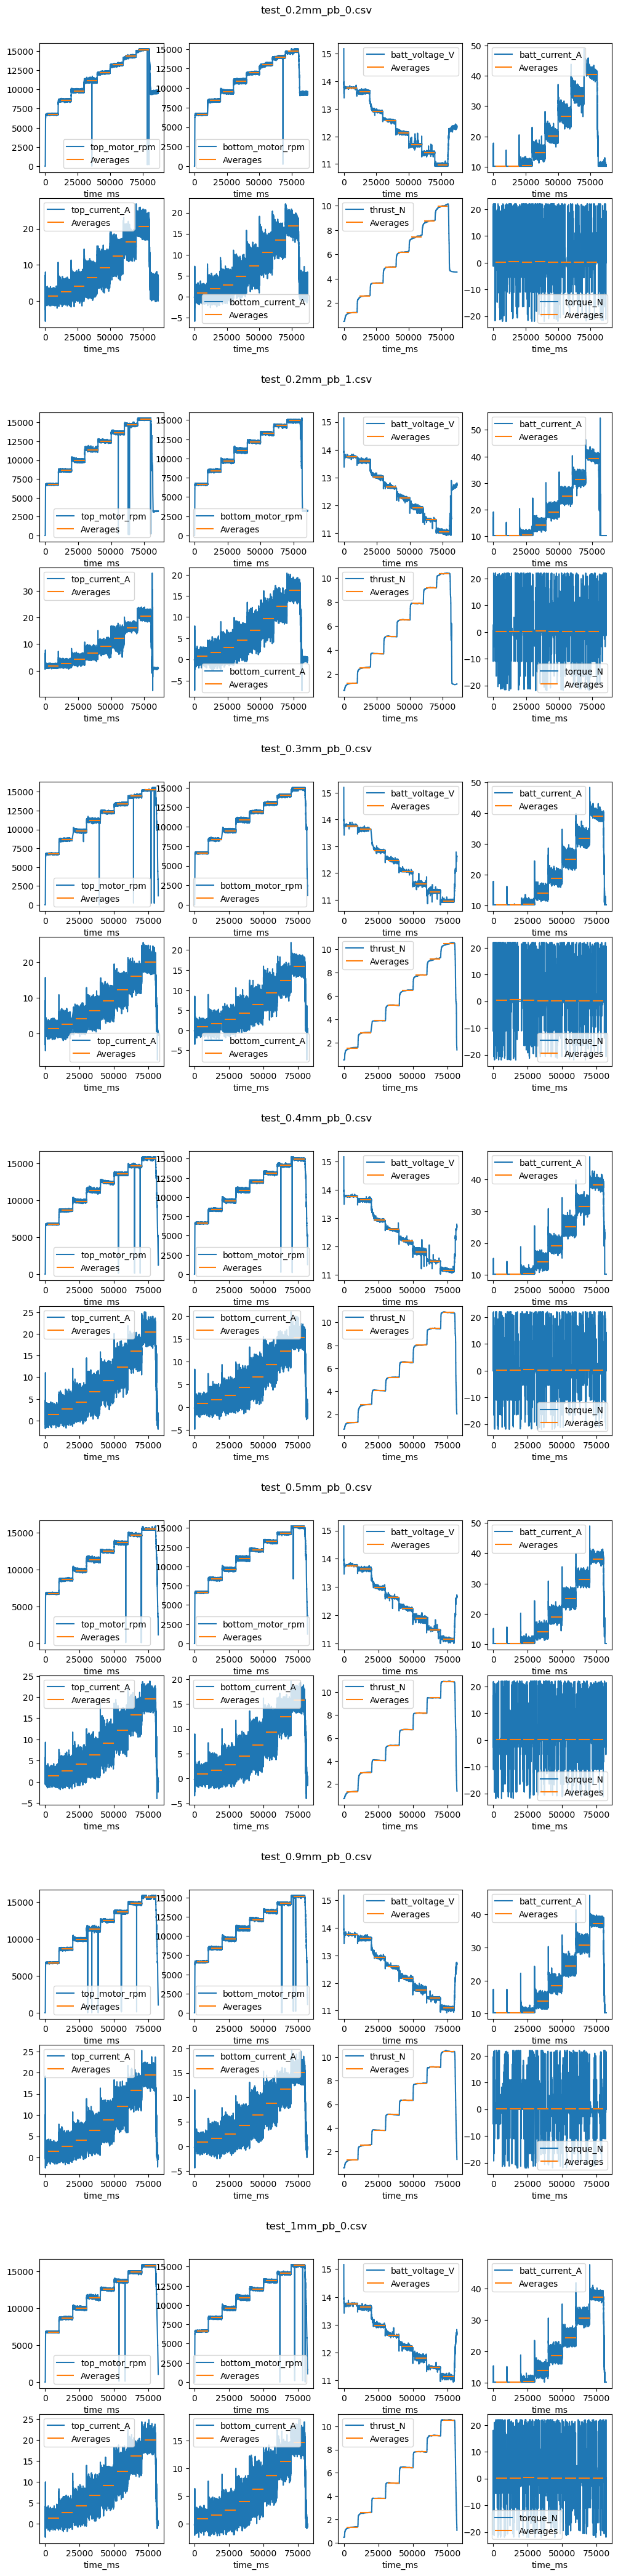

In [387]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [388]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "batt_voltage_mean": batt_voltage_mean,
        "hall_current_mean": hall_current_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": np.abs(batt_power_rel_err * batt_power_mean),
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [389]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

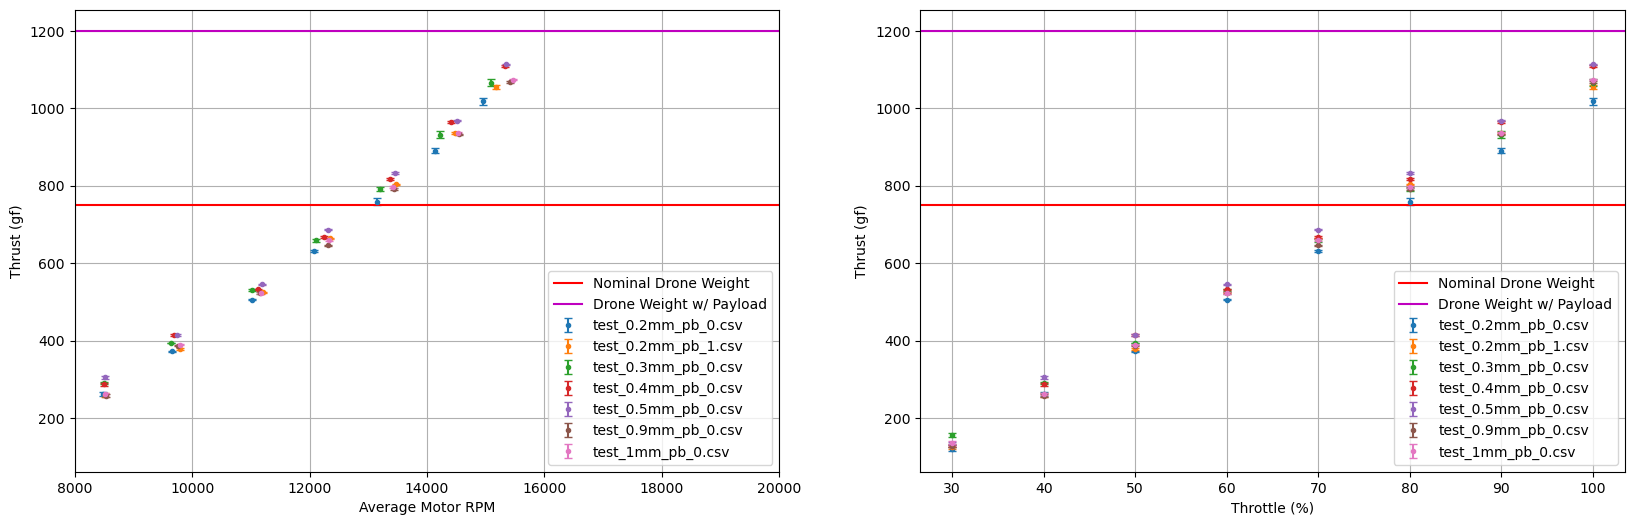

In [390]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    ax[0].errorbar(x="rpm_avg", y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
    ax[1].errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)

ax[0].set_xlabel("Average Motor RPM")
ax[0].set_ylabel("Thrust (gf)")
ax[0].set_xlim(8000, 20000)
ax[0].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[0].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[0].legend()
ax[0].grid()

ax[1].set_xlabel("Throttle (%)")
ax[1].set_ylabel("Thrust (gf)")
ax[1].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[1].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[1].legend()
ax[1].grid()

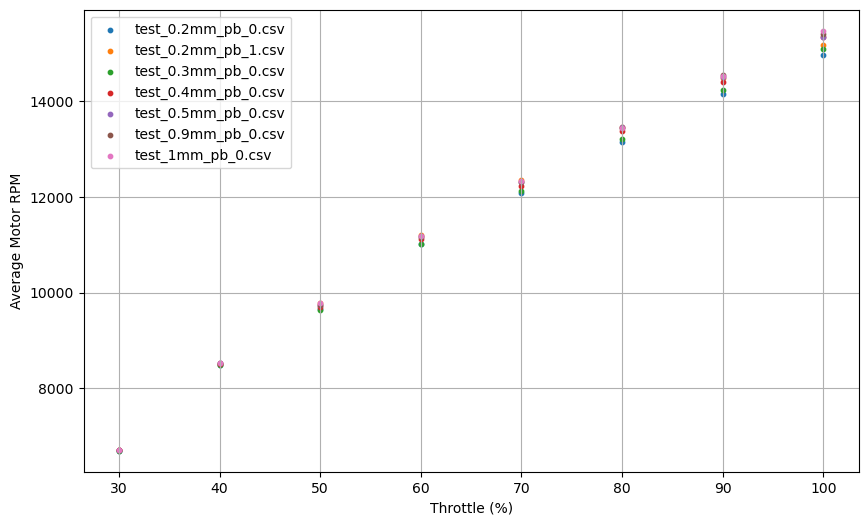

In [392]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="rpm_avg", data=grp, label=n, s=10)
plt.xlabel("Throttle (%)")
plt.ylabel("Average Motor RPM")
plt.legend()
plt.grid()
plt.show()

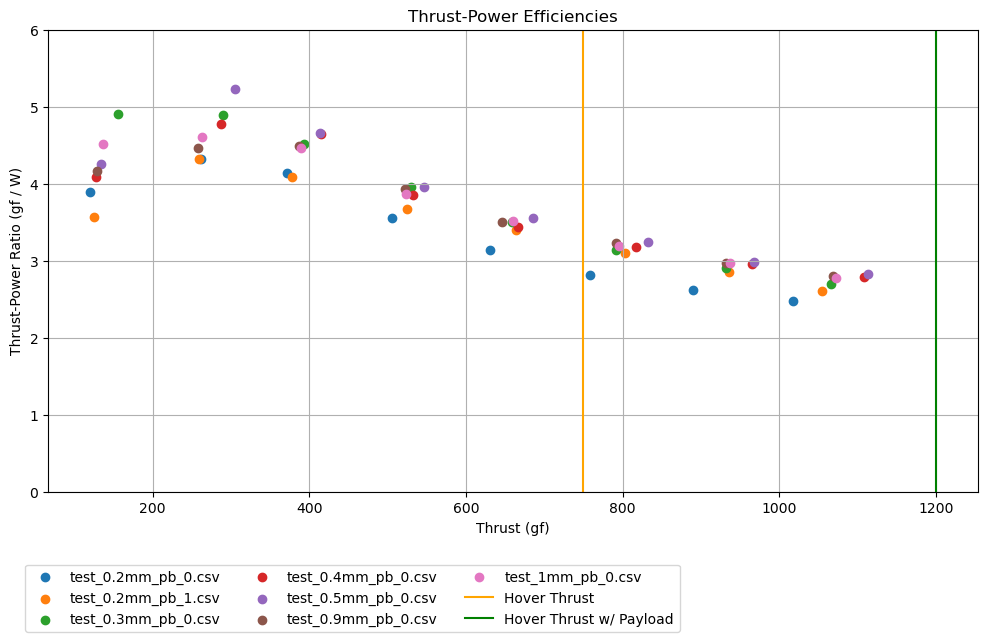

In [393]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
# plt.xlim(400, 1750)
plt.ylim(0,6)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

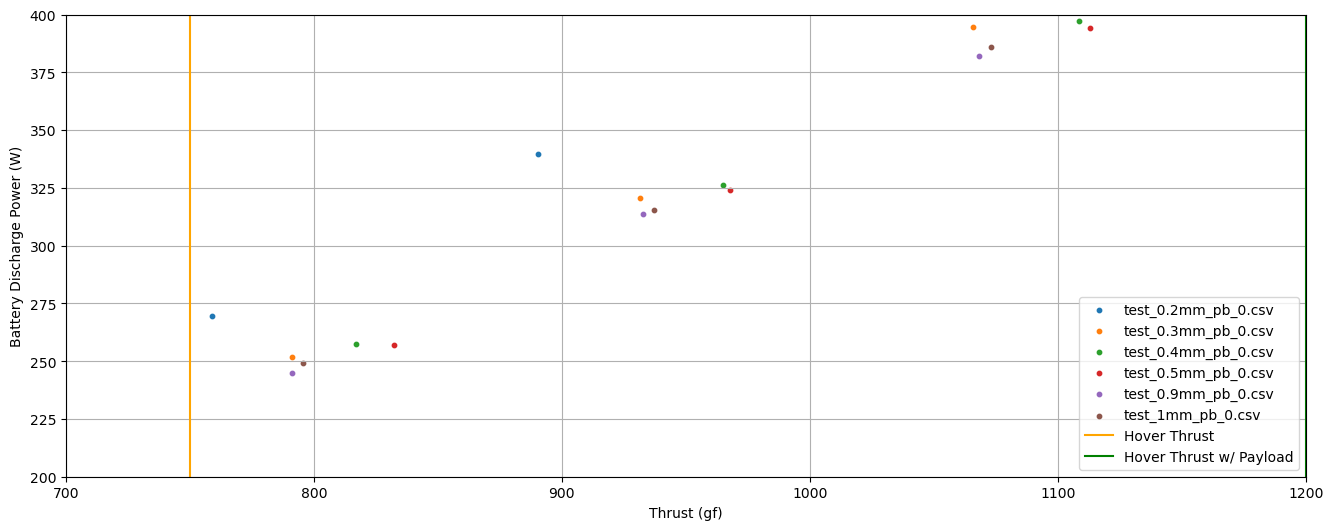

In [ ]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=10)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.xlim(700, 1200)
plt.ylim(200, 400)
plt.grid()
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

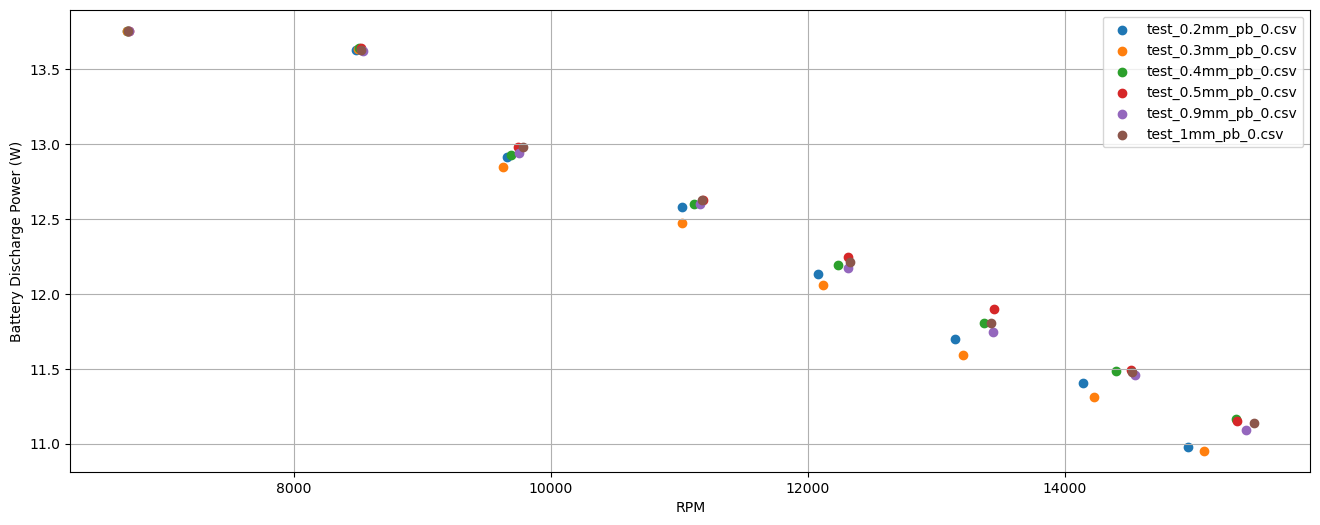

In [ ]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="rpm_avg", y="batt_voltage_mean", label=n, data=grp)
plt.xlabel("RPM")
plt.ylabel("Battery Discharge Power (W)")
plt.grid()
plt.legend()
plt.show()